https://github.com/stanford-policylab/opp/blob/master/data_readme.md

# Відмінності в наслідках залежно від типу порушення

Дослідницьке запитання: чи суттєво відрізняються результати зупинки (наприклад, попередження, штраф, арешт) залежно від типу порушення та чи існують демографічні відмінності в цих результатах?

#### Імпорт бібліотек і завантаження даних
У цьому блоці імпортується бібліотека `pandas`, яка є основною для роботи з табличними даними. Команда `pd.read_csv()` завантажує набір даних у форматі CSV і зберігає його у змінній `df`. Це перший крок для роботи з даними, що дозволяє використовувати функціонал Pandas для аналізу та обробки.

In [1]:
import pandas as pd

df = pd.read_csv('tn_nashville_2020_04_01.csv')

C:\Users\Admin777\AppData\Local\Temp\ipykernel_20608\166684692.py:3: DtypeWarning: Columns (6,8,15,16,17,22,23,24,25,29,30,31,32,33,35,36,37,38,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tn_nashville_2020_04_01.csv')


#### Перевірка структури даних і очистка
Тут виконується попереднє дослідження даних. Команда `df.head()` виводить перші 5 рядків для швидкого огляду. `df.info()` надає інформацію про типи даних і пропущені значення. Для очищення даних використовується `dropna()` (видалення пропущених значень) та `drop_duplicates()` (видалення дублікатів). Це забезпечує коректність і цілісність аналізу.

In [2]:
print(df.head())
print(df.info())

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

  raw_row_number        date      time  \
0         232947  2010-10-10       NaN   
1         237161  2010-10-10  10:00:00   
2         232902  2010-10-10  10:00:00   
3         233219  2010-10-10  22:00:00   
4         232780  2010-10-10  01:00:00   

                                            location        lat        lng  \
0  DOMINICAN DR & ROSA L PARKS BLVD, NASHVILLE, T...  36.187925 -86.798519   
1            1122 LEBANON PIKE, NASHVILLE, TN, 37210  36.155521 -86.735902   
2                       898 DAVIDSON DR, , TN, 37205  36.117420 -86.895593   
3  MURFREESBORO PIKE & NASHBORO BLVD, ANTIOCH, TN...  36.086799 -86.648581   
4                      BUCHANAN ST, NORTH, TN, 37208  36.180038 -86.809109   

  precinct  reporting_area   zone  subject_age  ...  \
0      6.0          4403.0  611.0         27.0  ...   
1      5.0          9035.0  513.0         18.0  ...   
2      1.0          5005.0  121.0         52.0  ...   
3      3.0          8891.0  325.0         25.0  ...   
4  

#### Унікальні значення
Виведення унікальних значень для колонок `violation` (тип порушення) та `outcome` (результат зупинки). Це допомагає зрозуміти категорії та структуру даних.

In [ ]:
print(df['violation'].unique())
print(df['outcome'].unique())

['moving traffic violation' 'vehicle equipment violation'
 'investigative stop' 'seatbelt violation' 'safety violation'
 'registration' 'child restraint' 'parking violation']


#### Аналіз пропущених значень
Аналіз пропущених значень у вибраних колонках. `isnull().sum()` рахує кількість пропущених значень, щоб визначити необхідність додаткової очистки.

In [10]:
print(df[['violation', 'outcome', 'subject_race',
          'subject_age', 'subject_sex']].isnull().sum())

violation       0
outcome         0
subject_race    0
subject_age     0
subject_sex     0
dtype: int64


#### Додаткова очистка
Фільтрування даних: видаляються рядки з пропущеними значеннями в основних колонках. Це зменшує обсяг даних, але підвищує їх якість для подальшого аналізу.

На щастя, згідно з попереднім аналізом, це не є потрібним для отриманих даних.

In [11]:
df_cleaned = df.dropna(subset=['violation', 'outcome',
                               'subject_race', 'subject_age', 'subject_sex'])

#### Перетворення типів даних
Категорії оптимізуються через `astype('category')`, що економить пам’ять і пришвидшує обчислення. Вік перетворюється у числовий формат, що є необхідним для побудови графіків.

Параметр `errors='coerce'` перетворює неправильні значення в NaN.

In [16]:
df_cleaned['violation'] = df_cleaned['violation'].astype('category')
df_cleaned['outcome'] = df_cleaned['outcome'].astype('category')
df_cleaned['subject_age'] = pd.to_numeric(df_cleaned['subject_age'], errors='coerce')

#### Графіки розподілу
Використовуються бібліотеки `seaborn` і `matplotlib` для побудови графіка розподілу порушень. `countplot` будує стовпчасту діаграму, що показує кількість спостережень для кожного типу порушень.

violation
moving traffic violation       7982
vehicle equipment violation    5435
safety violation               1561
registration                   1417
investigative stop             1352
seatbelt violation              596
parking violation                42
child restraint                  10
Name: count, dtype: int64
outcome
citation    7554
arrest      6364
warning     4477
Name: count, dtype: int64


C:\Users\Admin777\AppData\Local\Temp\ipykernel_20608\2785167391.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='violation', palette='Set2')


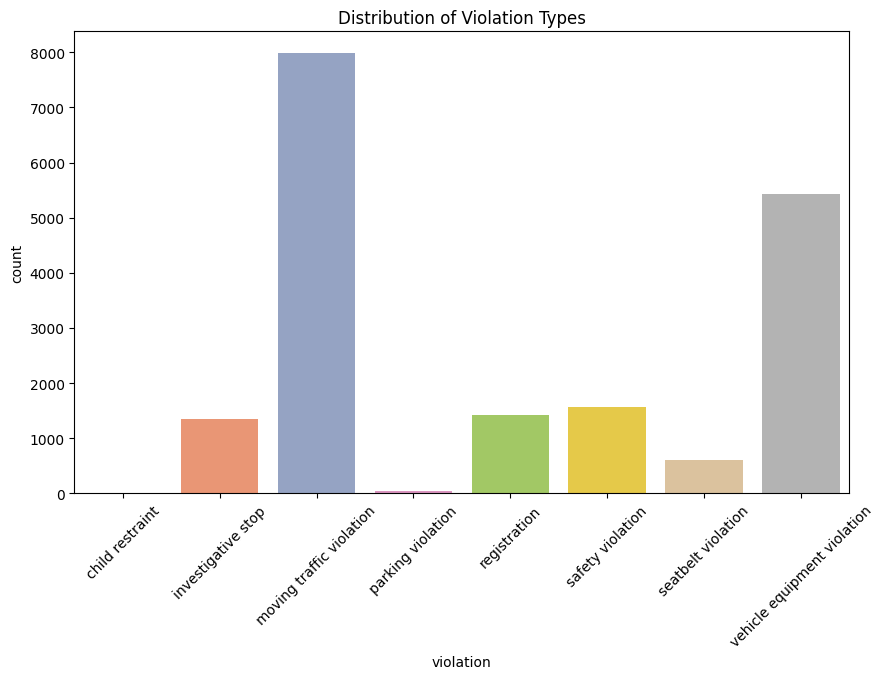

C:\Users\Admin777\AppData\Local\Temp\ipykernel_20608\2785167391.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='outcome', palette='Set3')


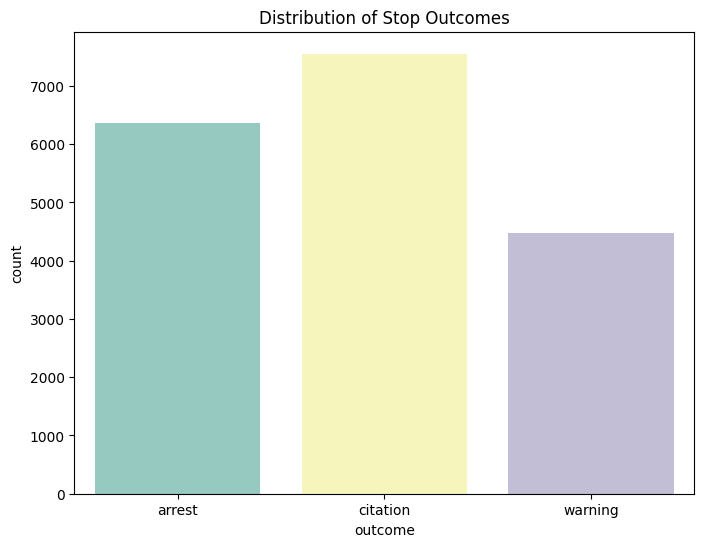

In [18]:
print(df_cleaned['violation'].value_counts())

print(df_cleaned['outcome'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df_cleaned, x='violation', palette='Set2')
plt.xticks(rotation=45)
plt.title('Distribution of Violation Types')
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(data=df_cleaned, x='outcome', palette='Set3')
plt.title('Distribution of Stop Outcomes')
plt.show()

#### Матриця перехресного підрахунку
Створюється таблиця підрахунків за категоріями `violation` і `outcome`. `heatmap` будує теплову карту, яка показує взаємозв’язки між категоріями.

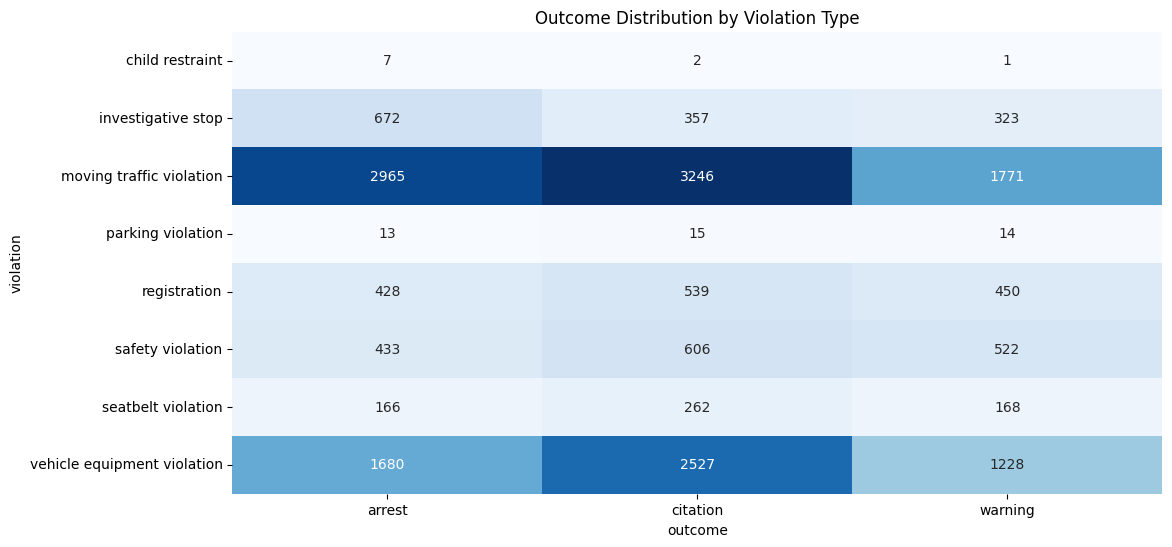

In [19]:
violation_outcome_table = pd.crosstab(df_cleaned['violation'], df_cleaned['outcome'])

plt.figure(figsize=(12,6))
sns.heatmap(violation_outcome_table, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Outcome Distribution by Violation Type')
plt.show()

#### Результати за расою та статтю
Побудова графіків для аналізу результатів залежно від раси та статі. Параметр `hue` розділяє результати (наприклад, арешти чи попередження) за категорією.

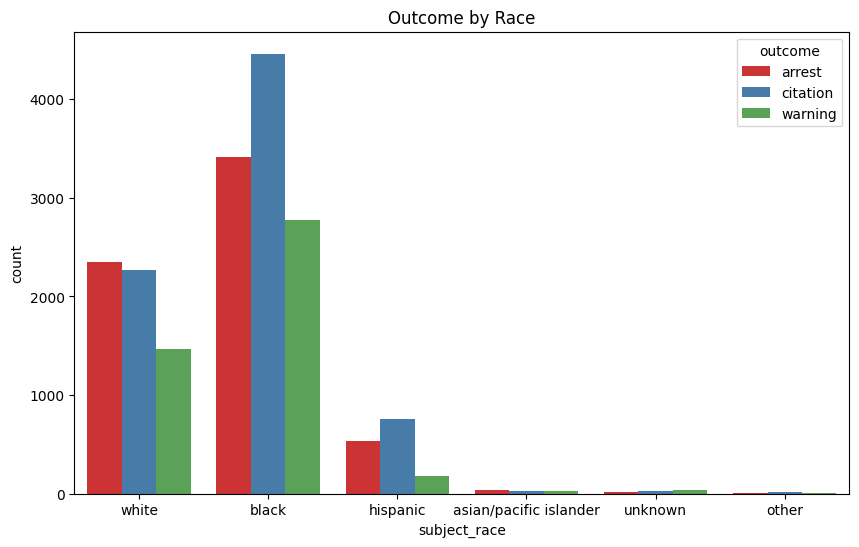

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_cleaned, x='subject_race', hue='outcome', palette='Set1')
plt.title('Outcome by Race')
plt.show()

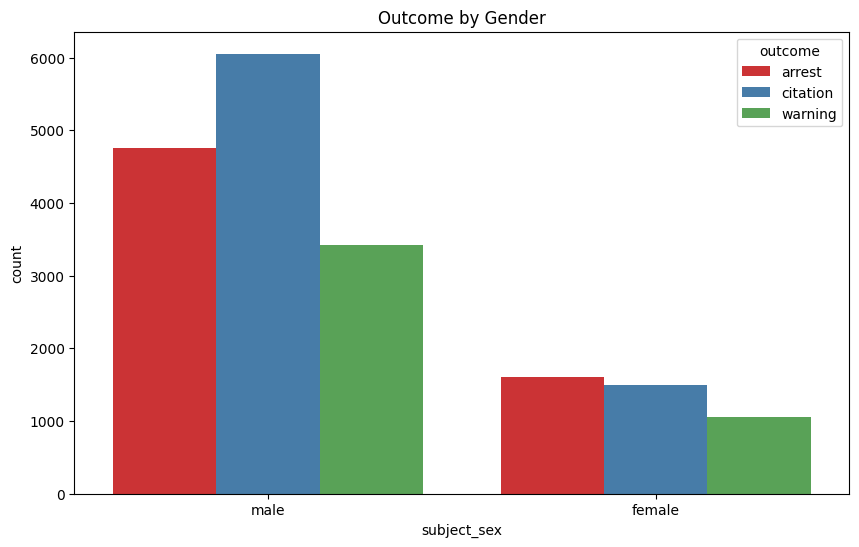

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_cleaned, x='subject_sex', hue='outcome', palette='Set1')
plt.title('Outcome by Gender')
plt.show()

#### Статистичний аналіз
Використовується тест χ² для перевірки залежності між категоріями. `p-value` допомагає визначити, чи є залежність статистично значущою.

In [26]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_cleaned['violation'], df_cleaned['outcome'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Test Statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square Test Statistic: 397.1478288796277
p-value: 5.0570891997137795e-76


In [27]:
race_outcome_table = pd.crosstab(df_cleaned['subject_race'], df_cleaned['outcome'])

chi2_race, p_race, dof_race, expected_race = chi2_contingency(race_outcome_table)

print(f'Chi-Square Test for Race and Outcome: {chi2_race}')
print(f'p-value for Race and Outcome: {p_race}')

Chi-Square Test for Race and Outcome: 247.31370318825878
p-value for Race and Outcome: 1.9922073692711609e-47


In [28]:
sex_outcome_table = pd.crosstab(df_cleaned['subject_sex'], df_cleaned['outcome'])

chi2_sex, p_sex, dof_sex, expected_sex = chi2_contingency(sex_outcome_table)

print(f'Chi-Square Test for Gender and Outcome: {chi2_sex}')
print(f'p-value for Gender and Outcome: {p_sex}')

Chi-Square Test for Gender and Outcome: 59.82119745992504
p-value for Gender and Outcome: 1.0232741925454312e-13


#### Вік і результати
Графік boxplot показує розподіл віку для різних результатів зупинок. Це допомагає зрозуміти, чи є відмінності у вікових групах залежно від результату.

C:\Users\Admin777\AppData\Local\Temp\ipykernel_20608\3062924521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='outcome', y='subject_age', palette='Set2')


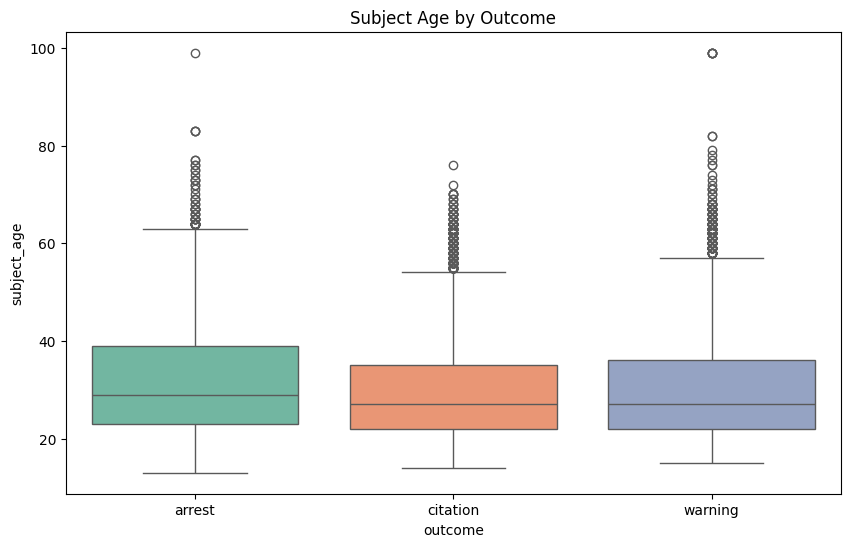

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_cleaned, x='outcome', y='subject_age', palette='Set2')
plt.title('Subject Age by Outcome')
plt.show()